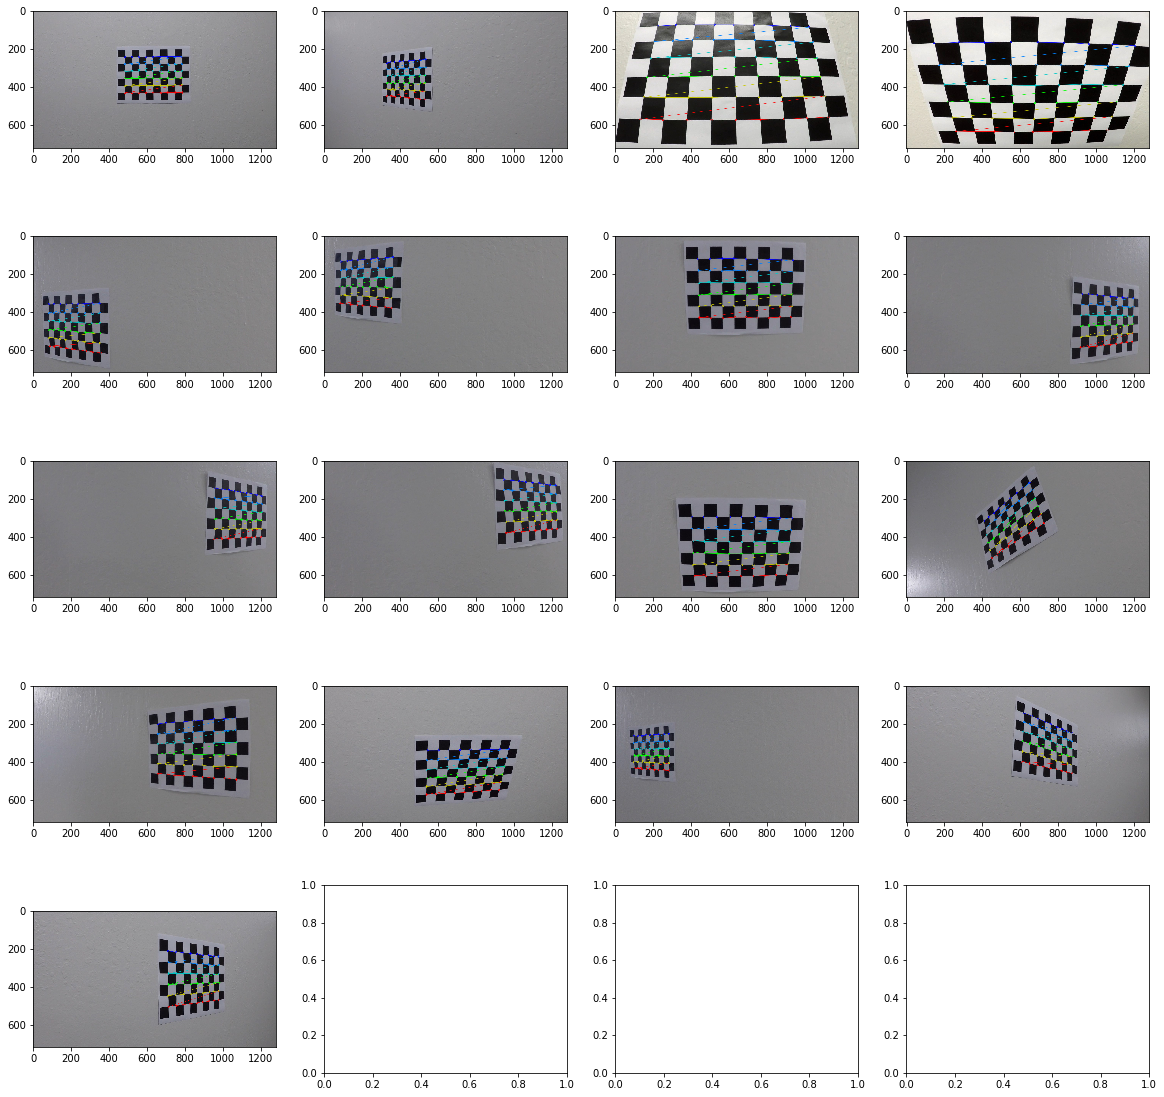

In [3]:
# camera calibration
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
%matplotlib inline

def display_images(images, nrows=5, ncols=4, figsize=(20,20)):
    f, axarr = plt.subplots(nrows, ncols, figsize=figsize)
    for idx, img in enumerate(images):
        # read in each image
        row = idx // ncols
        col = idx % ncols
        axarr[row, col].imshow(img)

# Read in and make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all the images

nx = 9
ny = 6

objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0), ... , (7, 5, 0)
objp = np.zeros((ny*nx, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates

images_to_display = []

for idx, fname in enumerate(images):
    # read in each image
    img = mpimg.imread(fname)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
 
    # If corners are found, add object points, image points
    if ret is True:
        imgpoints.append(corners)
        objpoints.append(objp)
        # draw and display the corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        images_to_display.append(img)

display_images(images_to_display)
    
# save calibration as pickle
dist_dict = {"objpoints": objpoints, "imgpoints" : imgpoints}
pickle.dump(dist_dict, open("dist_dict.p", "wb"))

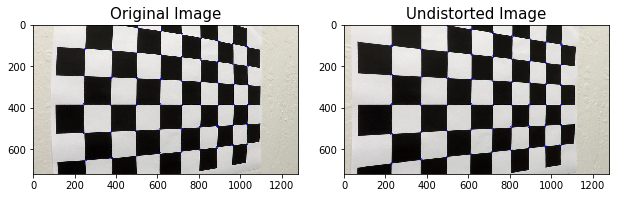

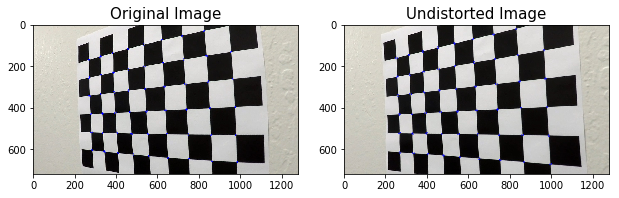

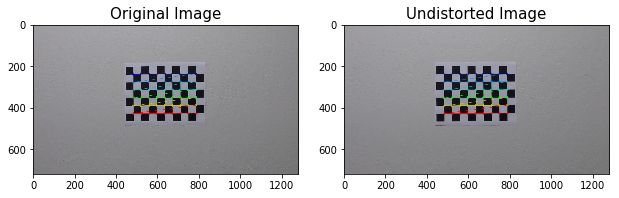

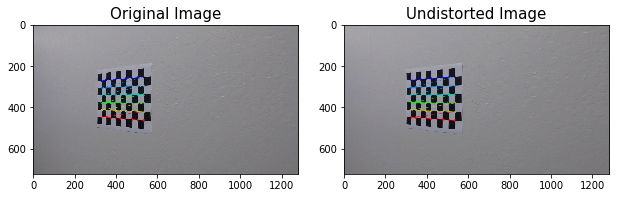

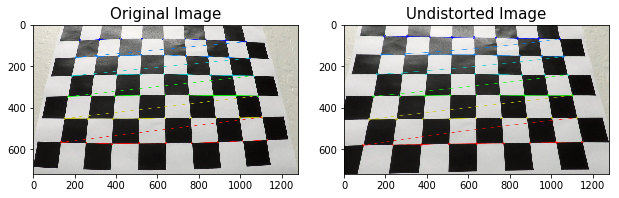

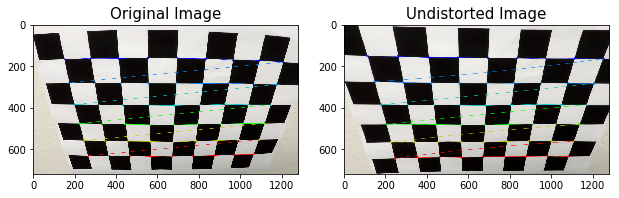

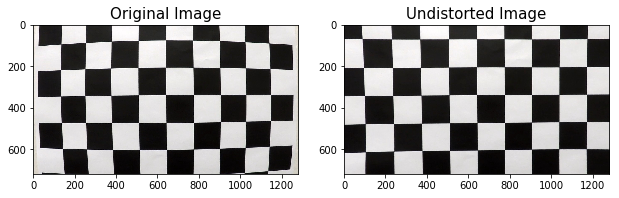

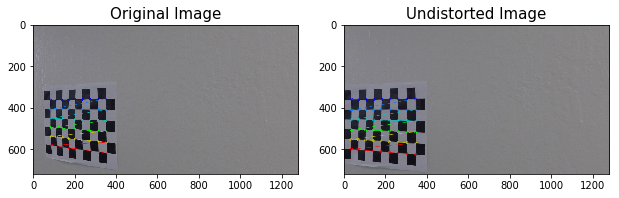

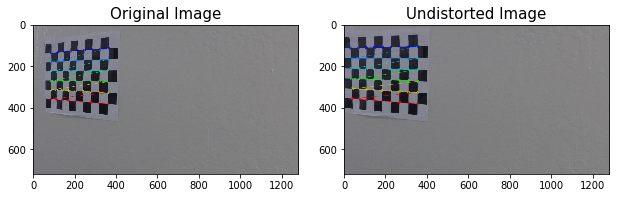

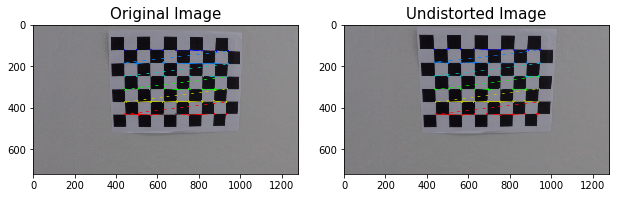

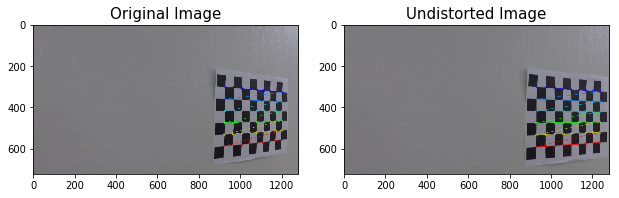

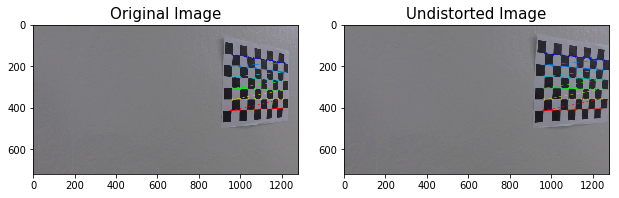

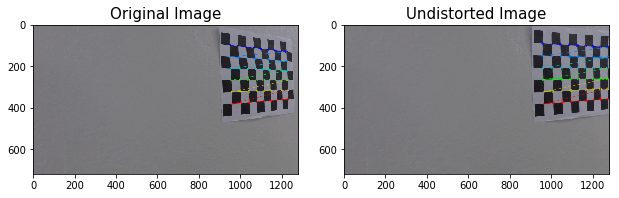

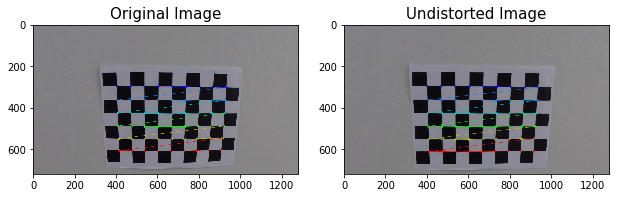

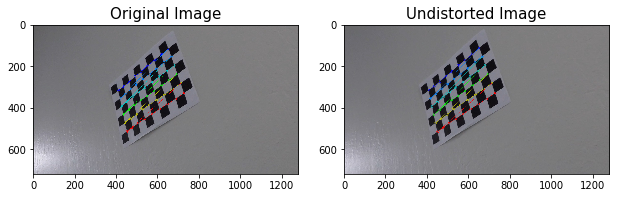

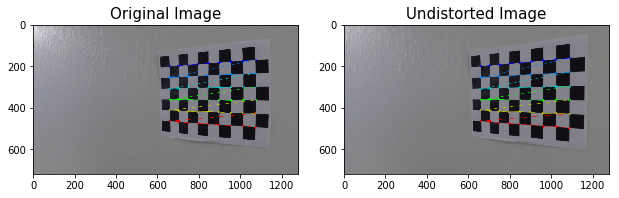

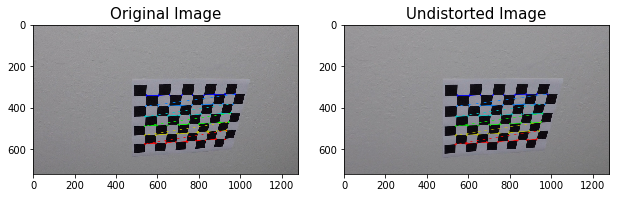

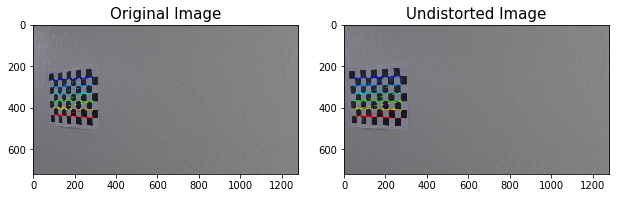

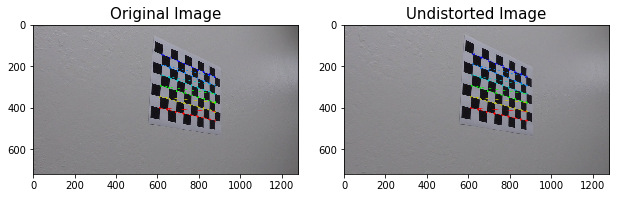

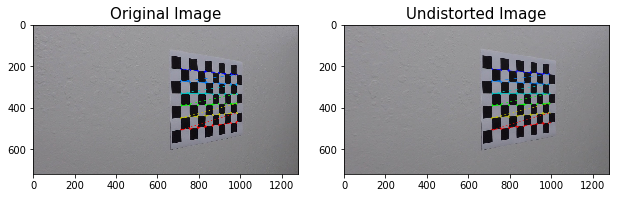

In [8]:
# visualize undistort on calibration images
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "./dist_dict.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Read in and make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Use cv2.calibrateCamera() and cv2.undistort()
    #undist = np.copy(img)  # Delete this line
    return undist

for fname in images:
    img = mpimg.imread(fname)
    undistorted = cal_undistort(img, objpoints, imgpoints)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=15)
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image', fontsize=15)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
